In [1]:
import os

# Define the relative path to the directory containing the signal files
relative_directory_path = os.path.join('PPGSignals')

# Get the absolute path
directory_path = os.path.abspath(relative_directory_path)

# Initialize a dictionary to store the signals from each file
signals = {}

# Iterate through all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):  # Process only text files
        file_path = os.path.join(directory_path, filename)

        # Read the signal values from the file
        with open(file_path, 'r') as file:
            signal = file.read().strip().split('\t')

        # Convert the list of strings to a list of floats
        signal = [float(value) for value in signal]
        filename=filename.replace(".txt","")
        # Store the signal in the dictionary with the filename as the key
        signals[filename] = signal


In [2]:
print("signal type: ",type(signals),"signal keys: ",signals.keys())


signal type:  <class 'dict'> signal keys:  dict_keys(['100_1', '100_2', '100_3', '103_1', '103_2', '103_3', '104_1', '104_2', '104_3', '105_1', '105_2', '105_3', '106_1', '106_2', '106_3', '107_1', '107_2', '107_3', '108_1', '108_2', '108_3', '10_1', '10_2', '10_3', '110_1', '110_2', '110_3', '111_1', '111_2', '111_3', '112_1', '112_2', '112_3', '113_1', '113_2', '113_3', '114_1', '114_2', '114_3', '115_1', '115_2', '115_3', '116_1', '116_2', '116_3', '119_1', '119_2', '119_3', '11_1', '11_2', '11_3', '120_1', '120_2', '120_3', '122_1', '122_2', '122_3', '123_1', '123_2', '123_3', '124_1', '124_2', '124_3', '125_1', '125_2', '125_3', '126_1', '126_2', '126_3', '127_1', '127_2', '127_3', '128_1', '128_2', '128_3', '12_1', '12_2', '12_3', '130_1', '130_2', '130_3', '131_1', '131_2', '131_3', '134_1', '134_2', '134_3', '135_1', '135_2', '135_3', '136_1', '136_2', '136_3', '137_1', '137_2', '137_3', '138_1', '138_2', '138_3', '139_1', '139_2', '139_3', '13_1', '13_2', '13_3', '140_1', '140

signals type:  <class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


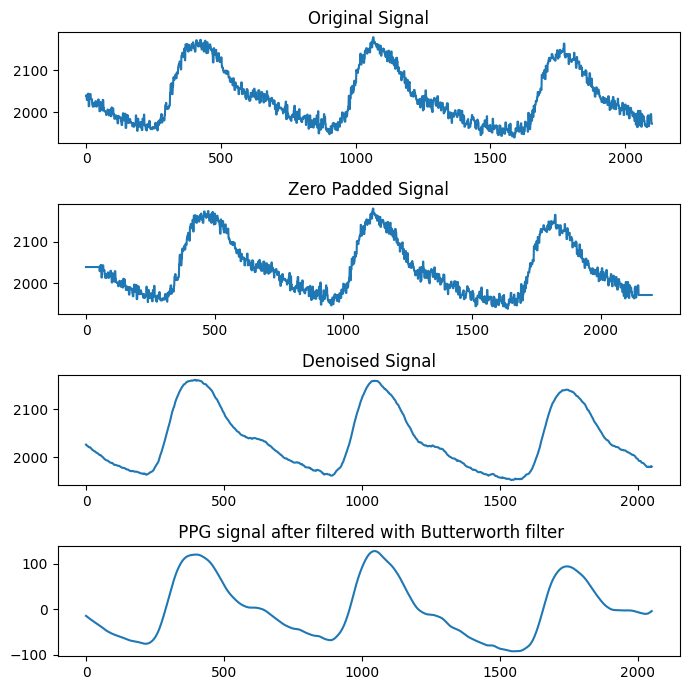

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, butter, filtfilt
"""by so much of analysis we have find out 231_1,231_2 have more samples """
worng_data1=signals['231_1']
signals['231_1']=worng_data1[0:2100]
worng_data2=signals['231_2']
signals['231_2']=worng_data2[0:2100]
# Sample PPG signal
ppg_signal = signals['8_1']
print("signals type: ",type(signals['8_1']))
print(type(ppg_signal))

plt.figure(figsize=(7, 7))
plt.subplot(4,1,1)
plt.plot(ppg_signal )
plt.title("Original Signal")
# Define padding size
pad_size = 50  # You can adjust this value based on the filter window size and expected edge effects

# Pad the signal
ppg_signal_padded = np.pad(ppg_signal, pad_size, mode='edge')
plt.subplot(4,1,2)
plt.plot(ppg_signal_padded )
plt.title("Zero Padded Signal")
print(type(ppg_signal_padded))
# Define the moving average filter
window_size = 50
moving_average_filter = np.ones(window_size) / window_size

# Apply the moving average filter
filtered_signal_ma = np.convolve(ppg_signal, moving_average_filter, mode='valid')
plt.subplot(4,1,3)
plt.plot(filtered_signal_ma )
plt.title("Denoised Signal")

# Design the Butterworth filter
fs = 1000  # Sampling frequency in Hz (replace with your actual sampling frequency)
lowcut = 0.5
highcut = 25
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist

b, a = butter(N=4, Wn=[low, high], btype='band')  # 4th order bandpass Butterworth filter

# Apply the Butterworth filter
filtered_signal_bw = filtfilt(b, a, filtered_signal_ma)
print(type(filtered_signal_bw))
plt.subplot(4,1,4)
plt.plot(filtered_signal_bw )
plt.title(" PPG signal after filtered with Butterworth filter")
plt.tight_layout()


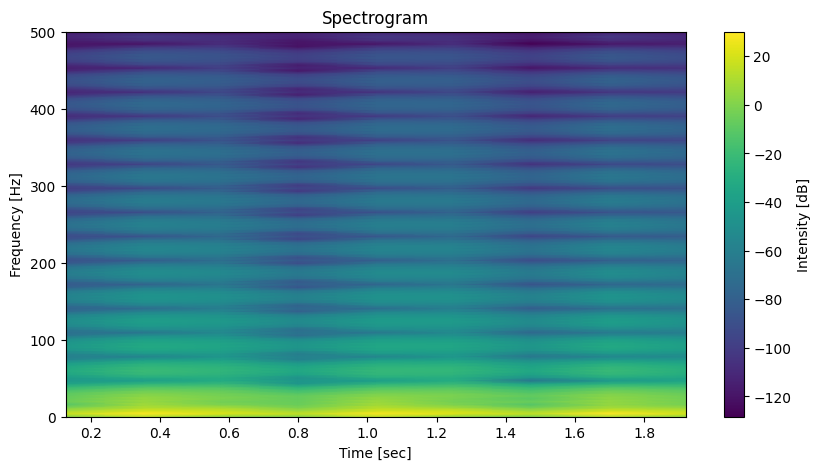

In [4]:

# Compute the spectrogram of the final filtered signal
frequencies, times, Sxx = spectrogram(filtered_signal_bw, fs=fs)

# Plot the spectrogram
plt.figure(figsize=(10, 5))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Intensity [dB]')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram')
plt.show()


In [5]:
a=list(signals.keys())

fs = 1000
lowcut = 0.5
highcut = 25
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist

for keys in a:
    
    ppg_signal = signals[keys]
    pad_size = 50
    ppg_signal_padded = np.pad(ppg_signal, pad_size, mode='edge')       #padding

    window_size = 50
    moving_average_filter = np.ones(window_size) / window_size          #moving average filter
    filtered_signal_ma = np.convolve(ppg_signal, moving_average_filter, mode='valid')


    b, a = butter(N=4, Wn=[low, high], btype='band')  # 4th order bandpass Butterworth filter

    # Apply the Butterworth filter
    filtered_signal_bw = filtfilt(b, a, filtered_signal_ma)
    sig=list(filtered_signal_bw)  
    signals[keys]=sig

In [6]:
import pandas as pd
# Load the data into a DataFrame
df = pd.read_excel('PPG-BP-dataset.xlsx')
df

Cardiovascular Dataset Information File  Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0                                      Num.  subject_ID   Sex(M/F)  Age(year)   
1                                         1           2     Female         45   
2                                         2           3     Female         50   
3                                         3           6     Female         47   
4                                         4           8       Male         45   
..                                      ...         ...        ...        ...   
215                                     215         415       Male         24   
216                                     216         416     Female         25   
217                                     217         417       Male         25   
218                                     218         418       Male         25   
219                                     219         419       Male         24   

     Unnamed: 4  Unnamed: 5                     Unnamed: 6  \
0    Height(cm)  Weight(kg)  Systolic Blood Pressure(mmHg)   
1           152          63                            161   
2           157          50                            160   
3           150          47                            101   
4           172          65                            136   
..          ...         ...                            ...   
215         180          70                            111   
216         156          47                             93   
217         176          55                            120   
218         173          63                            106   
219         175          58                            108   

                         Unnamed: 7       Unnamed: 8   Unnamed: 9  \
0    Diastolic Blood Pressure(mmHg)  Heart Rate(b/m)  BMI(kg/m^2)   
1                                89               97    27.268006   
2                                93               76    20.284799   
3                                71               79    20.888889   
4                                93               87    21.971336   
..                              ...              ...          ...   
215                              70               77    21.604938   
216                              57               79    19.312952   
217                              69               72    17.755682   
218                              69               67    21.049818   
219                              68               65    18.938776   

    Hospital Electronic Medical Record Unnamed: 11          Unnamed: 12  \
0                         Hypertension    Diabetes  cerebral infarction   
1                 Stage 2 hypertension         NaN                  NaN   
2                 Stage 2 hypertension         NaN                  NaN   
3                               Normal         NaN                  NaN   
4                      Prehypertension         NaN                  NaN   
..                                 ...         ...                  ...   
215                             Normal         NaN                  NaN   
216                             Normal         NaN                  NaN   
217                    Prehypertension         NaN                  NaN   
218                             Normal         NaN                  NaN   
219                             Normal         NaN                  NaN   

                 Unnamed: 13  
0    cerebrovascular disease  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
..                       ...  
215                      NaN  
216                      NaN  
217                      NaN  
218                      NaN  
219                      NaN  

[220 rows x 14 columns]

In [7]:
df.drop('Cardiovascular Dataset Information File',axis=1, inplace=True)
columns=['Unnamed: 3','Unnamed: 11','Unnamed: 12','Unnamed: 13']
df.drop(columns,axis=1, inplace=True)

#set column heading as row zero
df.columns = df.iloc[0]
df = df.iloc[1:]
df


0   subject_ID Sex(M/F) Height(cm) Weight(kg) Systolic Blood Pressure(mmHg)  \
1            2   Female        152         63                           161   
2            3   Female        157         50                           160   
3            6   Female        150         47                           101   
4            8     Male        172         65                           136   
5            9   Female        155         65                           123   
..         ...      ...        ...        ...                           ...   
215        415     Male        180         70                           111   
216        416   Female        156         47                            93   
217        417     Male        176         55                           120   
218        418     Male        173         63                           106   
219        419     Male        175         58                           108   

0   Diastolic Blood Pressure(mmHg) Heart Rate(b/m) BMI(kg/m^2)  \
1                               89              97   27.268006   
2                               93              76   20.284799   
3                               71              79   20.888889   
4                               93              87   21.971336   
5                               73              73   27.055151   
..                             ...             ...         ...   
215                             70              77   21.604938   
216                             57              79   19.312952   
217                             69              72   17.755682   
218                             69              67   21.049818   
219                             68              65   18.938776   

0            Hypertension  
1    Stage 2 hypertension  
2    Stage 2 hypertension  
3                  Normal  
4         Prehypertension  
5         Prehypertension  
..                    ...  
215                Normal  
216                Normal  
217       Prehypertension  
218                Normal  
219                Normal  

[219 rows x 9 columns]

In [8]:
def duplicate_rows(df):      #this is defined because for each patient we have 3 sample ppg signals
    

    new_rows = [] # create a list to store new rows
    for i in range(0, len(df)):
        subject_id = df.iloc[i]["subject_ID"]
        for j in range(1, 4):
            
            new_row = df.iloc[i].copy()
            new_row["subject_ID"] = f"{subject_id}_{j}"
            new_rows.append(new_row) # append the new row to the list

    new_df = pd.DataFrame(new_rows) # create a new DataFrame from the list of new rows
    return new_df

df_with_duplicates = duplicate_rows(df)

df_with_duplicates.set_index('subject_ID', inplace=True)
df_with_duplicates

0          Sex(M/F)  Height(cm)  Weight(kg)  Systolic Blood Pressure(mmHg)  \
subject_ID                                                                   
2_1          Female         152          63                            161   
2_2          Female         152          63                            161   
2_3          Female         152          63                            161   
3_1          Female         157          50                            160   
3_2          Female         157          50                            160   
...             ...         ...         ...                            ...   
418_2          Male         173          63                            106   
418_3          Male         173          63                            106   
419_1          Male         175          58                            108   
419_2          Male         175          58                            108   
419_3          Male         175          58                            108   

0           Diastolic Blood Pressure(mmHg)  Heart Rate(b/m)  BMI(kg/m^2)  \
subject_ID                                                                 
2_1                                     89               97    27.268006   
2_2                                     89               97    27.268006   
2_3                                     89               97    27.268006   
3_1                                     93               76    20.284799   
3_2                                     93               76    20.284799   
...                                    ...              ...          ...   
418_2                                   69               67    21.049818   
418_3                                   69               67    21.049818   
419_1                                   68               65    18.938776   
419_2                                   68               65    18.938776   
419_3                                   68               65    18.938776   

0                   Hypertension  
subject_ID                        
2_1         Stage 2 hypertension  
2_2         Stage 2 hypertension  
2_3         Stage 2 hypertension  
3_1         Stage 2 hypertension  
3_2         Stage 2 hypertension  
...                          ...  
418_2                     Normal  
418_3                     Normal  
419_1                     Normal  
419_2                     Normal  
419_3                     Normal  

[657 rows x 8 columns]

In [9]:

signal_keys=list(signals.keys())
X=list(signals.values())
print("no of signals:" ,len(X)," length of each signal:",len(X[0]))

Y=[]
for key in signal_keys:
  Y.append(df_with_duplicates.loc[key])

print(len(Y),len(Y[0]))
print(type(X),"   ",type(Y))
print(len(X),type(X),len(X[3]),type(X[0]),len(X[369])," worng data at:369-->231_1,370--->231_2 that we have corrected") 


no of signals: 657  length of each signal: 2051
657 8
<class 'list'>     <class 'list'>
657 <class 'list'> 2051 <class 'list'> 2051  worng data at:369-->231_1,370--->231_2 that we have corrected


In [10]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from imblearn.over_sampling import RandomOverSampler

# Assuming Y is an array with the last column as the target variable 'Hypertension'
# Convert the hypertension column to a separate target array
Y_hypertension = np.array([y.iloc[-1] for y in Y])  # Extract the last element using iloc
  # Extract the last element from each row # Adjust based on your actual target column


In [11]:
# Create a RandomOverSampler instance
ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)

# Fit and resample the data (X) and the target (Y_hypertension)
X_resampled, Y_hypertension_resampled = ros.fit_resample(X, Y_hypertension)

# Verify original class distribution
unique, counts = np.unique(Y_hypertension, return_counts=True)
original_distribution = dict(zip(unique, counts))
print("Original class distribution:", original_distribution)

# Define a custom strategy to triple the classes
# For example, if the original counts are {0: 50, 1: 30}, the target would be {0: 150, 1: 90}
target_distribution = {label: count * 3 for label, count in original_distribution.items()}

# Fit and resample again with the new strategy
ros = RandomOverSampler(sampling_strategy=target_distribution, random_state=42)
X_resampled, Y_hypertension_resampled = ros.fit_resample(X, Y_hypertension)

# Verifying the new sizes
print("Original X size:", len(X), "New X size:", len(X_resampled), "Signal length:", len(X_resampled[0]))
print("Original Y_hypertension size:", len(Y_hypertension), "New Y_hypertension size:", len(Y_hypertension_resampled))



Original class distribution: {'Normal': 240, 'Prehypertension': 255, 'Stage 1 hypertension': 102, 'Stage 2 hypertension': 60}
Original X size: 657 New X size: 1971 Signal length: 2051
Original Y_hypertension size: 657 New Y_hypertension size: 1971


In [12]:
# Separate other features (except 'Hypertension') from Y
Y_other_features = np.array([y[:-1] for y in Y])  # All columns except 'Hypertension'

# Resample these features based on the indices of the resampled Y_hypertension
Y_other_features_resampled = Y_other_features[ros.sample_indices_]

# Combine resampled Y_other_features and Y_hypertension_resampled back together
Y_resampled = np.hstack((Y_other_features_resampled, Y_hypertension_resampled.reshape(-1, 1)))


In [13]:
# Assuming Y_resampled is a numpy array
print("Shape of Y_resampled:", Y_resampled.shape)
Y_resampled[:][7]

Shape of Y_resampled: (1971, 8)


array(['Female', 155, 55, 135, 75, 72, 22.892819979188346,
       'Prehypertension'], dtype=object)

In [14]:
prebp=0
normal=0
bps1=0
bps2=0
for bp in Y_resampled[:,7]:
    if(bp=='Normal'):
        normal=normal+1
        
    elif(bp=='Prehypertension'):
        prebp=prebp+1

    elif(bp=='Stage 1 hypertension'):
        bps2=bps2+1

    elif(bp=='Stage 2 hypertension'):
        bps1=bps1+1
print(f"normal: {normal}, Prehypertension: {prebp}, Stage 1 hypertension: {bps1},  Stage 2 hypertension: {bps2} " )

normal: 720, Prehypertension: 765, Stage 1 hypertension: 180,  Stage 2 hypertension: 306 


In [15]:
sex=Y_resampled[:,0]
height=Y_resampled[:,1].astype(np.float64)
weight=Y_resampled[:,2].astype(np.float64)
Ysbp=Y_resampled[:,3].astype(np.float64)
Ydbp=Y_resampled[:,4].astype(np.float64)
heartRate=Y_resampled[:,5].astype(np.float64)
BMI=Y_resampled[:,6].astype(np.float64)
Y_hypertension=Y_resampled[:,7]

print(len(sex),len(height),len(weight),len(heartRate),len(BMI),len(Ysbp),len(Ydbp),len(Y_hypertension),type(Ysbp),Ysbp.dtype)


1971 1971 1971 1971 1971 1971 1971 1971 <class 'numpy.ndarray'> float64


In [16]:
"""for estimation of systolic and diastolic blood pressure"""

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets for  systolic blood pressure
Xsbp_train, Xsbp_test, ysbp_train, ysbp_test = train_test_split(X_resampled, Ysbp, test_size=0.2, random_state=42)
print(f"Xsbp_train: {np.shape(Xsbp_train)}, Xsbp_test: {np.shape(Xsbp_test)}, ysbp_train:{ np.shape(ysbp_train)}, ysbp_test: { np.shape(ysbp_test)}")


# Split the data into training and testing sets for diastolic blood pressure
Xdbp_train, Xdbp_test, ydbp_train, ydbp_test = train_test_split(X_resampled, Ydbp, test_size=0.2, random_state=42)
print(f"Xdbp_train: {np.shape(Xdbp_train)}, Xdbp_test: {np.shape(Xdbp_test)}, ydbp_train:{ np.shape(ydbp_train)}, ydbp_test: { np.shape(ydbp_test)}")

Xsbp_train: (1576, 2051), Xsbp_test: (395, 2051), ysbp_train:(1576,), ysbp_test: (395,)
Xdbp_train: (1576, 2051), Xdbp_test: (395, 2051), ydbp_train:(1576,), ydbp_test: (395,)


In [33]:

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense,Activation 



input_shape = (2051,1) 
input_layer = Input(shape=input_shape)

# First Branch
x = Conv1D(64, 16, strides=2, activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Conv1D(64, 16, strides=2, activation='relu')(x)
x = BatchNormalization()(x)
x = Conv1D(128, 16, strides=2, activation='relu')(x)
x = BatchNormalization()(x)
x = Conv1D(256, 32, strides=3, activation='relu')(x)
x = BatchNormalization()(x)
x = Conv1D(128, 16, strides=2, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(2)(x)
# Flatten and Dense layers
x = Flatten()(x)
x = Dense(1)(x)
output_layer =Activation('linear')(x)



model_sbp = Model(inputs=input_layer, outputs=output_layer)     # Defined Sbp model
model_sbp.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae']) # Compiled Sbp model


model_dbp = Model(inputs=input_layer, outputs=output_layer)     # Defined Dbp model
model_dbp.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae'])  # Compiled Dbp model

model_dbp.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 2051, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 1018, 64)            │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 1018, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ (None, 502, 64)             │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 502, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_16 (Conv1D)                   │ (None, 244, 128)            │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 244, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_17 (Conv1D)                   │ (None, 71, 256)             │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 71, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_18 (Conv1D)                   │ (None, 28, 128)             │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 28, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 14, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1792)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │           1,793 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,775,489 (6.77 MB)

 Trainable params: 1,774,209 (6.77 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [34]:
"""
ensuring the input test and train cases are in 3D of the form X(num_test_samples, sequence_length, num_features)
and also ensuring the output test and train cases are in 2D of the form Y(num_test_samples, num_features)
 """
Xsbp_train = np.array(Xsbp_train).reshape((1576, 2051,1))
ysbp_train = np.array(ysbp_train).reshape((1576, 1))

from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    'Sbp_best_model.keras',  # filename to save the model
    monitor='val_mae',  # metric to monitor
    save_best_only=True,  # save only the best model
    mode='min',  # we want the minimum mae
    verbose=1 # print messages when saving the model
)

# fitting for estimation of systolic blood pressures
Sbp_history=model_sbp.fit(Xsbp_train, ysbp_train, epochs=50, batch_size=40,validation_split=0.2,callbacks=[checkpoint_callback])

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - loss: 14681.8818 - mae: 119.0441
Epoch 1: val_mae improved from inf to 99.26548, saving model to Sbp_best_model.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 401ms/step - loss: 14641.3926 - mae: 118.8624 - val_loss: 10979.8652 - val_mae: 99.2655
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - loss: 8446.3330 - mae: 88.3391
Epoch 2: val_mae improved from 99.26548 to 73.31392, saving model to Sbp_best_model.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 413ms/step - loss: 8398.5391 - mae: 88.0418 - val_loss: 6737.4463 - val_mae: 73.3139
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - loss: 2227.2900 - mae: 41.4156
Epoch 3: val_mae improved from 73.31392 to 38.72167, saving model to Sbp_best_model.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 418ms/step - loss: 2204.9517 - mae: 41.1316 - val_loss: 2066.2590 - val_mae: 38.7217
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - loss: 418.2099 - mae: 15.6140
Epoch 4: val_mae did not improve from 38.72

32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 455ms/step - loss: 48.4027 - mae: 5.3059 - val_loss: 189.8276 - val_mae: 10.7914
Epoch 26/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - loss: 43.0952 - mae: 5.2196
Epoch 26: val_mae improved from 8.73241 to 7.48130, saving model to Sbp_best_model.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 415ms/step - loss: 43.1551 - mae: 5.2196 - val_loss: 104.6058 - val_mae: 7.4813
Epoch 27/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - loss: 43.2393 - mae: 5.0763
Epoch 27: val_mae did not improve from 7.48130
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 415ms/step - loss: 43.5017 - mae: 5.0912 - val_loss: 105.0721 - val_mae: 7.5531
Epoch 28/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - loss: 59.0391 - mae: 5.9745
Epoch 28: val_mae did not improve from 7.48130
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 417ms/step - loss: 59.0009 - mae: 5.9711 - val_loss: 143.0042 - val_mae: 9.3321
Epoch 29/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - loss: 49.7792 - mae: 5.3602
Epoch 29: val_mae did not improve from 7

In [35]:
from tensorflow.keras.models import load_model
model_sbp=load_model('Sbp_best_model.keras')


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 70.1156 - mae: 4.7936
Test Loss: 75.42680358886719
Test MAE: 4.969277381896973
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


Text(0.5, 1.0, 'Real Ysbp - Predicted Ysbp')

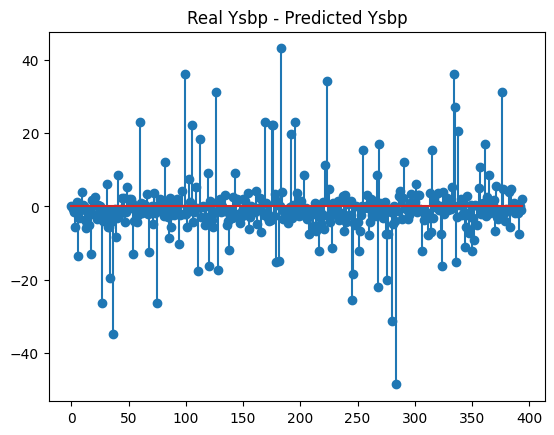

In [36]:

# Evaluate the model on test data
Xsbp_test = np.array(Xsbp_test).reshape((395, 2051,1))
ysbp_test = np.array(ysbp_test).reshape((395, 1))

loss,mae= model_sbp.evaluate(Xsbp_test, ysbp_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")
Sbp_predictions = model_sbp.predict(Xsbp_test)
plt.stem(ysbp_test-Sbp_predictions)
plt.title("Real Ysbp - Predicted Ysbp")


In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Reshape input and output arrays
X_signal = np.array(X_resampled).reshape((1971, 2051, 1))
Ysbp_orignal = np.array(Ysbp).reshape((1971, 1))
Overall_loss,Overall_mae= model_sbp.evaluate(X_signal, Ysbp_orignal)
print(f"Test Loss: {Overall_loss}")
print(f"Test MAE: {Overall_mae}")




62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 39.3809 - mae: 3.5576
Test Loss: 29.838603973388672
Test MAE: 3.1842072010040283


In [38]:
"""
ensuring the input test and train cases are in 3D of the form X(num_test_samples, sequence_length, num_features)
and also ensuring the output test and train cases are in 2D of the form Y(num_test_samples, num_features)
 """
Xdbp_train = np.array(Xdbp_train).reshape((1576, 2051,1))
ydbp_train = np.array(ydbp_train).reshape((1576, 1))
checkpoint_callback = ModelCheckpoint(
    'Dbp_best_model.keras',  # filename to save the model
    monitor='val_mae',  # metric to monitor
    save_best_only=True,  # save only the best model
    mode='min',  # we want the minimum mae
    verbose=1 # print messages when saving the model
)
# fitting for estimation of systolic blood pressures
Dbp_history=model_dbp.fit(Xdbp_train, ydbp_train, epochs=40, batch_size=40,validation_split=0.2,callbacks=[checkpoint_callback])

Epoch 1/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - loss: 820.0314 - mae: 20.6938
Epoch 1: val_mae improved from inf to 57.16156, saving model to Dbp_best_model.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 479ms/step - loss: 805.4985 - mae: 20.4552 - val_loss: 3512.4912 - val_mae: 57.1616
Epoch 2/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - loss: 103.9821 - mae: 7.9836
Epoch 2: val_mae improved from 57.16156 to 40.98175, saving model to Dbp_best_model.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 423ms/step - loss: 103.4619 - mae: 7.9621 - val_loss: 1791.4091 - val_mae: 40.9818
Epoch 3/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - loss: 61.8588 - mae: 6.1933
Epoch 3: val_mae improved from 40.98175 to 25.48690, saving model to Dbp_best_model.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 408ms/step - loss: 61.7454 - mae: 6.1870 - val_loss: 733.0311 - val_mae: 25.4869
Epoch 4/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - loss: 48.9106 - mae: 5.4224
Epoch 4: val_mae improved from 25.48690 to 14.64747, saving mod

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 572ms/step - loss: 7.1621 - mae: 2.0764
Epoch 26: val_mae did not improve from 2.68066
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 605ms/step - loss: 7.1453 - mae: 2.0730 - val_loss: 36.8525 - val_mae: 4.8215
Epoch 27/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - loss: 5.5535 - mae: 1.7954
Epoch 27: val_mae did not improve from 2.68066
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 585ms/step - loss: 5.5554 - mae: 1.7958 - val_loss: 39.2016 - val_mae: 5.0024
Epoch 28/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - loss: 6.5337 - mae: 2.0025
Epoch 28: val_mae did not improve from 2.68066
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 543ms/step - loss: 6.5112 - mae: 1.9988 - val_loss: 47.9949 - val_mae: 5.9072
Epoch 29/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - loss: 5.0990 - mae: 1.8017
Epoch 29: val_mae did not improve from 2.68066
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 599ms/step - loss: 5.0844 - mae: 1.7979 - val_loss: 53.3111 - val_mae: 6.4901
Epoch 30/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - loss:

In [39]:
from tensorflow.keras.models import load_model
model_dbp=load_model('Dbp_best_model.keras')


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 23.8878 - mae: 2.8127
Test Loss: 27.43208122253418
Test MAE: 3.0088329315185547
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


Text(0.5, 1.0, 'Real Ydbp - Predicted Ydbp')

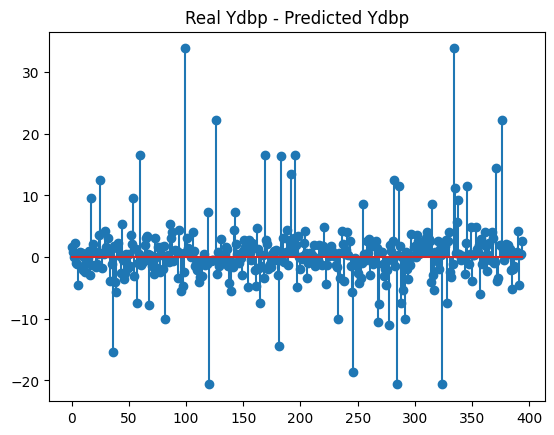

In [40]:


# Evaluate the model on test data
Xdbp_test = np.array(Xdbp_test).reshape((395, 2051,1))
ydbp_test = np.array(ydbp_test).reshape((395, 1))

loss,mae = model_dbp.evaluate(Xdbp_test, ydbp_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")
Dbp_predictions = model_dbp.predict(Xdbp_test)
plt.stem(ydbp_test-Dbp_predictions)
plt.title("Real Ydbp - Predicted Ydbp")

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Reshape input and output arrays
X_signal = np.array(X_resampled).reshape((1971, 2051, 1))
Ydbp_orignal = np.array(Ydbp).reshape((1971, 1))
Overall_loss,Overall_mae= model_dbp.evaluate(X_signal, Ydbp_orignal)
print(f"Test Loss: {Overall_loss}")
print(f"Test MAE: {Overall_mae}")
# Make predictions using the model (no need for Ysbp_orignal in the predict method)


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 14.3007 - mae: 2.2557
Test Loss: 11.720190048217773
Test MAE: 2.0842955112457275


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


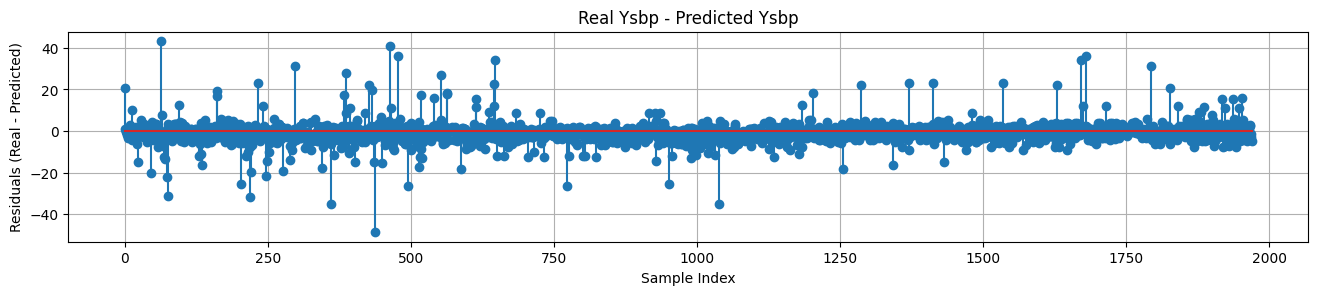

62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


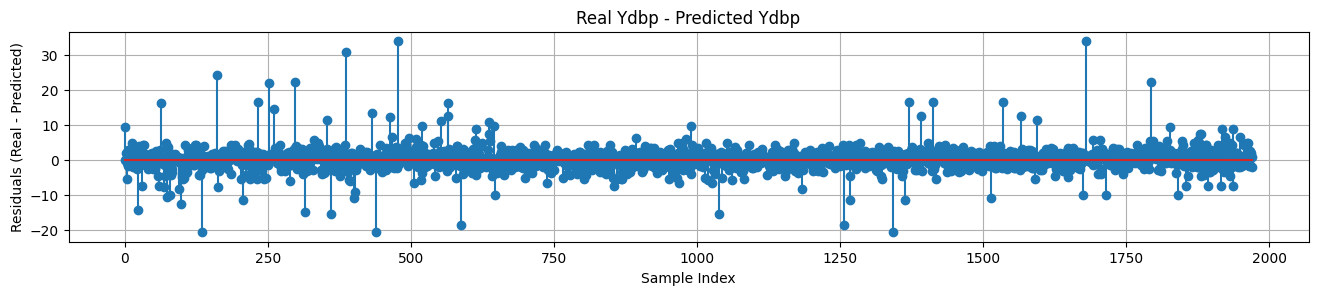

<Figure size 640x480 with 0 Axes>

In [42]:

predicted_Sbp = model_sbp.predict(X_signal)
residuals = Ysbp_orignal.flatten() - predicted_Sbp.flatten()  # Ensure both are 1D
plt.figure(figsize=(16, 6))
# Plot the residuals
plt.subplot(2,1,1)
plt.stem(residuals)
plt.title("Real Ysbp - Predicted Ysbp")
plt.xlabel("Sample Index")
plt.ylabel("Residuals (Real - Predicted)")
plt.grid()
plt.show()

predicted_Dbp = model_dbp.predict(X_signal)

residuals = Ydbp_orignal.flatten() - predicted_Dbp.flatten()  # Ensure both are 1D
plt.figure(figsize=(16, 6))
plt.subplot(2,1,2)
# Plot the residuals
plt.stem(residuals)
plt.title("Real Ydbp - Predicted Ydbp")
plt.xlabel("Sample Index")
plt.ylabel("Residuals (Real - Predicted)")
plt.grid()
plt.show()
# Adjust layout to prevent overlap
plt.tight_layout()

In [43]:
import numpy as np

# Example initialization (modify according to your actual data)
# Y_resampled = np.array([['Female'], ['Male'], ['Female'], ['Male']])  # Sample data

# Iterate over each row in the first column of Y_resampled
for i in range(Y_resampled.shape[0]):  # Use shape[0] to get the number of rows
    if Y_resampled[i, 0] == 'Female':
        Y_resampled[i, 0] = 0
    else:
        Y_resampled[i, 0] = 1

# Convert column to the appropriate type (e.g., integer)
Y_resampled[:, 0] = Y_resampled[:, 0].astype(int)

# Output the modified column
print(Y_resampled[:, 0])


[0 0 0 ... 0 1 0]


In [44]:
X_class = np.concatenate((Y_resampled[:, :3], predicted_Sbp, predicted_Dbp,Y_resampled[:, 5:7]), axis=1).astype(np.float64)

Y_class=(Y_resampled[:,7])
print("X shape: ",X_class.shape,"Yshape: ",Y_class.shape)

X shape:  (1971, 7) Yshape:  (1971,)


In [74]:
#Classification of Hypertension Levels Based on ppg signals Using CNN
from tensorflow.keras.layers import Softmax, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
num_classes=4
# Define the input shape based on your data
input_shape = (7, 1)

# Define the input layer with the correct shape
input_layer = Input(shape=input_shape)

# First convolutional block
x = Conv1D(16,1, strides=1, activation='relu')(input_layer)
x = BatchNormalization()(x)

# Second convolutional block
x = Conv1D(32,1, strides=1, activation='relu')(x)
x = BatchNormalization()(x)

# Third convolutional block
x = Conv1D(32,1, strides=1, activation='relu')(x)
x = BatchNormalization()(x)
# Fourth convolutional block
x = Conv1D(64,1, strides=1, activation='relu')(x)
x = BatchNormalization()(x)

x = Conv1D(128,1, strides=1, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)
# Flatten layer
x = Flatten()(x)

# Fully connected layer with 128 units
x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001))(x)

# Fully connected layer with 64 units
x = Dense(4, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001))(x)

# Output layer with Softmax activation
output_layer = Dense(num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()



Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 7, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_39 (Conv1D)                   │ (None, 7, 16)               │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 7, 16)               │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_40 (Conv1D)                   │ (None, 7, 32)               │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_40               │ (None, 7, 32)               │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_41 (Conv1D)                   │ (None, 7, 32)               │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 7, 32)               │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_42 (Conv1D)                   │ (None, 7, 64)               │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 7, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_43 (Conv1D)                   │ (None, 7, 128)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 7, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 4)                   │             516 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 4)                   │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,968 (245.97 KB)

 Trainable params: 62,424 (243.84 KB)

 Non-trainable params: 544 (2.12 KB)

In [46]:
# Convert string labels to numerical format

label_mapping = {'Normal': 0, 'Prehypertension': 1, 'Stage 1 hypertension': 2, 'Stage 2 hypertension': 3}
Y_class = np.array([label_mapping[label] for label in Y_class])
print(Y_class,np.shape(Y_class),type(Y_class),type(Y_class[0]))

[2 2 2 ... 3 3 3] (1971,) <class 'numpy.ndarray'> <class 'numpy.int32'>


In [47]:
# One-hot encode the labels
num_classes=4
Y_class_one_hot = tf.keras.utils.to_categorical(Y_class, num_classes)
print(Y_class_one_hot)
np.shape(Y_class_one_hot)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


(1971, 4)

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_class, Y_class_one_hot, test_size=0.25, random_state=42)
print(f"X_train: {np.shape(X_train)}, X_test: {np.shape(X_test)}, y_train: {np.shape(y_train)}, y_test: {np.shape(y_test)}")


X_train: (1478, 7), X_test: (493, 7), y_train: (1478, 4), y_test: (493, 4)


In [75]:
# Train the model
X_train = np.array(X_train).reshape((1478,7,1))
checkpoint_callback = ModelCheckpoint(
    'best_Class_model.keras',  # filename to save the model
    monitor='val_accuracy',  # metric to monitor
    save_best_only=True,  # save only the best model
    mode='max',  # we want the maximum accuracy
    verbose=1 # print messages when saving the model
)


class_history =model.fit(X_train, y_train, epochs=400, batch_size=40, validation_split=0.20,callbacks=[checkpoint_callback])




Epoch 1/400
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3689 - loss: 1.2453
Epoch 1: val_accuracy improved from -inf to 0.06419, saving model to best_Class_model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.3844 - loss: 1.2022 - val_accuracy: 0.0642 - val_loss: 1.8370
Epoch 2/400
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5078 - loss: 0.8218
Epoch 2: val_accuracy did not improve from 0.06419
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5089 - loss: 0.8208 - val_accuracy: 0.0642 - val_loss: 2.0041
Epoch 3/400
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5567 - loss: 0.7276
Epoch 3: val_accuracy did not improve from 0.06419
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5552 - loss: 0.7257 - val_accuracy: 0.0642 - val_loss: 2.1114
Epoch 4/400
20/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5281 - loss: 0.7079
Epoch 4: val_accuracy did not improve from 0.06419
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5400 - loss: 0.6

Epoch 25/400
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9245 - loss: 0.2421
Epoch 25: val_accuracy improved from 0.79392 to 0.88176, saving model to best_Class_model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9231 - loss: 0.2457 - val_accuracy: 0.8818 - val_loss: 0.5078
Epoch 26/400
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9340 - loss: 0.2180
Epoch 26: val_accuracy did not improve from 0.88176
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9329 - loss: 0.2197 - val_accuracy: 0.8514 - val_loss: 0.5419
Epoch 27/400
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9059 - loss: 0.2398
Epoch 27: val_accuracy did not improve from 0.88176
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9086 - loss: 0.2383 - val_accuracy: 0.8716 - val_loss: 0.5220
Epoch 28/400
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9412 - loss: 0.2012
Epoch 28: val_accuracy did not improve from 0.88176
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9411 

Epoch 50/400
21/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9451 - loss: 0.1860
Epoch 50: val_accuracy did not improve from 0.89527
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9457 - loss: 0.1823 - val_accuracy: 0.8885 - val_loss: 0.4945
Epoch 51/400
21/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9587 - loss: 0.1553
Epoch 51: val_accuracy did not improve from 0.89527
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9559 - loss: 0.1619 - val_accuracy: 0.8682 - val_loss: 0.5131
Epoch 52/400
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9208 - loss: 0.2044
Epoch 52: val_accuracy did not improve from 0.89527
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9244 - loss: 0.2010 - val_accuracy: 0.8919 - val_loss: 0.5088
Epoch 53/400
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9584 - loss: 0.1605
Epoch 53: val_accuracy did not improve from 0.89527
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9565 - loss: 0.1617 - val_accuracy: 0.8885 - val_l

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9679 - loss: 0.1347 - val_accuracy: 0.8953 - val_loss: 0.4942
Epoch 76/400
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9746 - loss: 0.1162
Epoch 76: val_accuracy did not improve from 0.89527
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9721 - loss: 0.1224 - val_accuracy: 0.8851 - val_loss: 0.4699
Epoch 77/400
21/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9549 - loss: 0.1606
Epoch 77: val_accuracy did not improve from 0.89527
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9551 - loss: 0.1572 - val_accuracy: 0.8953 - val_loss: 0.4776
Epoch 78/400
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9577 - loss: 0.1434
Epoch 78: val_accuracy did not improve from 0.89527
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9566 - loss: 0.1454 - val_accuracy: 0.8953 - val_loss: 0.4957
Epoch 79/400
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9623 - loss: 0.1301
Epoch 79: val_accuracy did not improve f

Epoch 101/400
20/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9668 - loss: 0.1120 
Epoch 101: val_accuracy did not improve from 0.89865
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9671 - loss: 0.1151 - val_accuracy: 0.8851 - val_loss: 0.4933
Epoch 102/400
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9596 - loss: 0.1239
Epoch 102: val_accuracy did not improve from 0.89865
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9599 - loss: 0.1261 - val_accuracy: 0.8919 - val_loss: 0.4954
Epoch 103/400
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9692 - loss: 0.1205
Epoch 103: val_accuracy did not improve from 0.89865
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9684 - loss: 0.1218 - val_accuracy: 0.8547 - val_loss: 0.5351
Epoch 104/400
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9549 - loss: 0.1279
Epoch 104: val_accuracy did not improve from 0.89865
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9554 - loss: 0.1283 - val_accuracy: 0.854

25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9796 - loss: 0.0915
Epoch 126: val_accuracy did not improve from 0.90541
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9789 - loss: 0.0933 - val_accuracy: 0.8885 - val_loss: 0.5095
Epoch 127/400
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9854 - loss: 0.0851
Epoch 127: val_accuracy did not improve from 0.90541
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9847 - loss: 0.0870 - val_accuracy: 0.8986 - val_loss: 0.5109
Epoch 128/400
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9688 - loss: 0.1073
Epoch 128: val_accuracy did not improve from 0.90541
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9694 - loss: 0.1065 - val_accuracy: 0.8953 - val_loss: 0.5021
Epoch 129/400
21/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9657 - loss: 0.1091
Epoch 129: val_accuracy did not improve from 0.90541
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9669 - loss: 0.1085 - val_accuracy: 0.8919 - val_loss: 0

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9800 - loss: 0.0816 - val_accuracy: 0.9054 - val_loss: 0.5131
Epoch 152/400
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9842 - loss: 0.0869
Epoch 152: val_accuracy did not improve from 0.90541
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9831 - loss: 0.0901 - val_accuracy: 0.9054 - val_loss: 0.5107
Epoch 153/400
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9737 - loss: 0.1014
Epoch 153: val_accuracy did not improve from 0.90541
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9755 - loss: 0.0980 - val_accuracy: 0.9020 - val_loss: 0.5197
Epoch 154/400
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9683 - loss: 0.1088
Epoch 154: val_accuracy did not improve from 0.90541
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9710 - loss: 0.1045 - val_accuracy: 0.9020 - val_loss: 0.5211
Epoch 155/400
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9767 - loss: 0.0888
Epoch 155: val_accuracy did not i

Epoch 177/400
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9871 - loss: 0.0633
Epoch 177: val_accuracy did not improve from 0.90878
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9870 - loss: 0.0637 - val_accuracy: 0.9088 - val_loss: 0.5372
Epoch 178/400
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9762 - loss: 0.0766
Epoch 178: val_accuracy did not improve from 0.90878
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9756 - loss: 0.0800 - val_accuracy: 0.8919 - val_loss: 0.5229
Epoch 179/400
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9769 - loss: 0.0813
Epoch 179: val_accuracy improved from 0.90878 to 0.91216, saving model to best_Class_model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9781 - loss: 0.0807 - val_accuracy: 0.9122 - val_loss: 0.5107
Epoch 180/400
21/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9790 - loss: 0.0892
Epoch 180: val_accuracy did not improve from 0.91216
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 

25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9833 - loss: 0.0656
Epoch 202: val_accuracy did not improve from 0.91554
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9833 - loss: 0.0666 - val_accuracy: 0.8547 - val_loss: 0.6334
Epoch 203/400
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9865 - loss: 0.0651
Epoch 203: val_accuracy did not improve from 0.91554
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9860 - loss: 0.0654 - val_accuracy: 0.8986 - val_loss: 0.5752
Epoch 204/400
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9902 - loss: 0.0539
Epoch 204: val_accuracy did not improve from 0.91554
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9895 - loss: 0.0551 - val_accuracy: 0.9054 - val_loss: 0.5396
Epoch 205/400
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9831 - loss: 0.0741
Epoch 205: val_accuracy did not improve from 0.91554
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9831 - loss: 0.0744 - val_accuracy: 0.9088 - val_loss: 0

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9848 - loss: 0.0638 - val_accuracy: 0.8986 - val_loss: 0.5659
Epoch 228/400
20/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9866 - loss: 0.0696
Epoch 228: val_accuracy did not improve from 0.91554
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9863 - loss: 0.0694 - val_accuracy: 0.8986 - val_loss: 0.5813
Epoch 229/400
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9908 - loss: 0.0479
Epoch 229: val_accuracy did not improve from 0.91554
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9902 - loss: 0.0503 - val_accuracy: 0.9020 - val_loss: 0.5480
Epoch 230/400
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9899 - loss: 0.0560
Epoch 230: val_accuracy did not improve from 0.91554
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9898 - loss: 0.0563 - val_accuracy: 0.8919 - val_loss: 0.5724
Epoch 231/400
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9916 - loss: 0.0576
Epoch 231: val_accuracy did not i

Epoch 253/400
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9892 - loss: 0.0492
Epoch 253: val_accuracy did not improve from 0.91554
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9899 - loss: 0.0491 - val_accuracy: 0.9088 - val_loss: 0.5501
Epoch 254/400
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9939 - loss: 0.0490
Epoch 254: val_accuracy did not improve from 0.91554
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9934 - loss: 0.0491 - val_accuracy: 0.8851 - val_loss: 0.6271
Epoch 255/400
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9954 - loss: 0.0486
Epoch 255: val_accuracy did not improve from 0.91554
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9936 - loss: 0.0525 - val_accuracy: 0.8953 - val_loss: 0.6172
Epoch 256/400
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9912 - loss: 0.0559
Epoch 256: val_accuracy did not improve from 0.91554
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9911 - loss: 0.0562 - val_accuracy: 0.8953

24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9874 - loss: 0.0581
Epoch 278: val_accuracy did not improve from 0.91554
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9873 - loss: 0.0586 - val_accuracy: 0.8953 - val_loss: 0.6576
Epoch 279/400
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9924 - loss: 0.0479
Epoch 279: val_accuracy did not improve from 0.91554
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9925 - loss: 0.0480 - val_accuracy: 0.9020 - val_loss: 0.6342
Epoch 280/400
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9918 - loss: 0.0475
Epoch 280: val_accuracy did not improve from 0.91554
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9918 - loss: 0.0480 - val_accuracy: 0.8986 - val_loss: 0.6305
Epoch 281/400
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9956 - loss: 0.0436
Epoch 281: val_accuracy did not improve from 0.91554
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9956 - loss: 0.0434 - val_accuracy: 0.8986 - val_loss: 0

23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9873 - loss: 0.0628
Epoch 303: val_accuracy did not improve from 0.91892
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9879 - loss: 0.0607 - val_accuracy: 0.9122 - val_loss: 0.5888
Epoch 304/400
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9939 - loss: 0.0437
Epoch 304: val_accuracy did not improve from 0.91892
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9938 - loss: 0.0437 - val_accuracy: 0.8986 - val_loss: 0.6609
Epoch 305/400
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9897 - loss: 0.0527
Epoch 305: val_accuracy did not improve from 0.91892
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9898 - loss: 0.0524 - val_accuracy: 0.8885 - val_loss: 0.5852
Epoch 306/400
21/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9865 - loss: 0.0507
Epoch 306: val_accuracy did not improve from 0.91892
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9873 - loss: 0.0512 - val_accuracy: 0.9189 - val_loss:

24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9978 - loss: 0.0387
Epoch 328: val_accuracy did not improve from 0.91892
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9969 - loss: 0.0402 - val_accuracy: 0.9054 - val_loss: 0.6483
Epoch 329/400
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9967 - loss: 0.0441
Epoch 329: val_accuracy did not improve from 0.91892
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9964 - loss: 0.0447 - val_accuracy: 0.9020 - val_loss: 0.6548
Epoch 330/400
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9929 - loss: 0.0407
Epoch 330: val_accuracy did not improve from 0.91892
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9930 - loss: 0.0406 - val_accuracy: 0.9088 - val_loss: 0.6154
Epoch 331/400
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9966 - loss: 0.0392
Epoch 331: val_accuracy did not improve from 0.91892
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9962 - loss: 0.0399 - val_accuracy: 0.8986 - val_loss: 0

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9937 - loss: 0.0380 - val_accuracy: 0.8953 - val_loss: 0.6787
Epoch 354/400
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9903 - loss: 0.0460
Epoch 354: val_accuracy did not improve from 0.91892
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9908 - loss: 0.0451 - val_accuracy: 0.9088 - val_loss: 0.6618
Epoch 355/400
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9828 - loss: 0.0602
Epoch 355: val_accuracy did not improve from 0.91892
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9829 - loss: 0.0600 - val_accuracy: 0.8851 - val_loss: 0.6803
Epoch 356/400
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9944 - loss: 0.0413
Epoch 356: val_accuracy did not improve from 0.91892
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9943 - loss: 0.0416 - val_accuracy: 0.9020 - val_loss: 0.6663
Epoch 357/400
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9950 - loss: 0.0387
Epoch 357: val_accuracy did not 

Epoch 379/400
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9959 - loss: 0.0372
Epoch 379: val_accuracy did not improve from 0.91892
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9959 - loss: 0.0372 - val_accuracy: 0.9020 - val_loss: 0.6749
Epoch 380/400
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9938 - loss: 0.0387
Epoch 380: val_accuracy did not improve from 0.91892
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9939 - loss: 0.0386 - val_accuracy: 0.9020 - val_loss: 0.7021
Epoch 381/400
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9940 - loss: 0.0392
Epoch 381: val_accuracy did not improve from 0.91892
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9940 - loss: 0.0392 - val_accuracy: 0.8986 - val_loss: 0.7080
Epoch 382/400
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9985 - loss: 0.0304
Epoch 382: val_accuracy did not improve from 0.91892
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9984 - loss: 0.0305 - val_accuracy: 0.9088

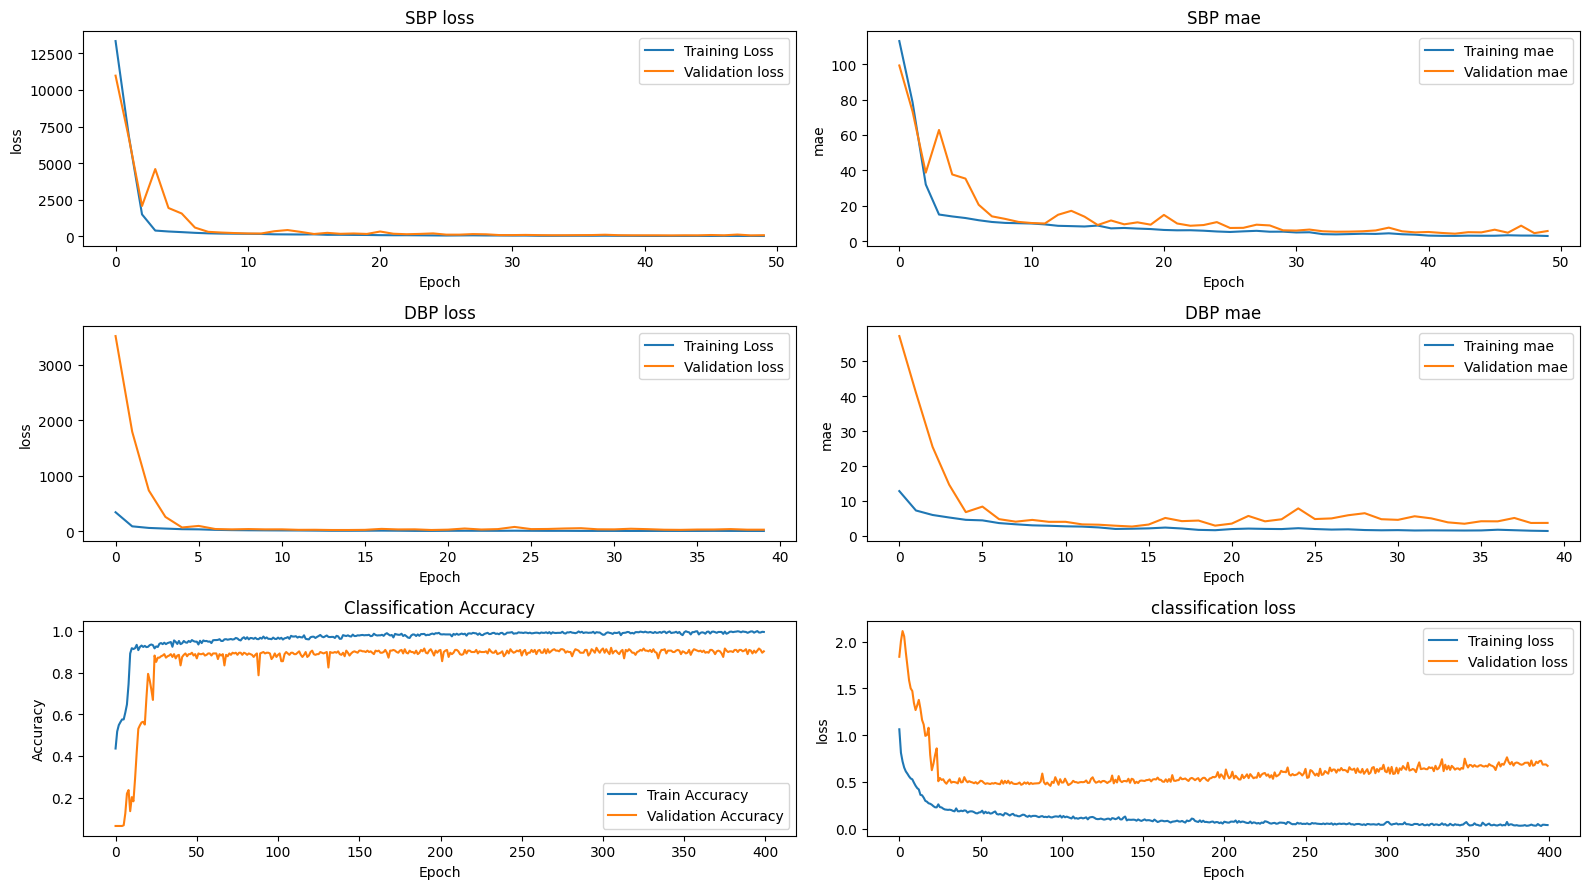

In [76]:
# Plot training & validation accuracy values


plt.figure(figsize=(16, 9))
plt.subplot(3, 2, 1) 
plt.plot(Sbp_history.history['loss'], label='Training Loss')
plt.plot(Sbp_history.history['val_loss'], label='Validation loss')
plt.title('SBP loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.subplot(3, 2,2) 
plt.plot(Sbp_history.history['mae'], label='Training mae')
plt.plot(Sbp_history.history['val_mae'], label='Validation mae')
plt.title('SBP mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.subplot(3, 2, 3)
plt.plot(Dbp_history.history['loss'], label='Training Loss')
plt.plot(Dbp_history.history['val_loss'], label='Validation loss')
plt.title('DBP loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.subplot(3, 2,4) 
plt.plot(Dbp_history.history['mae'], label='Training mae')
plt.plot(Dbp_history.history['val_mae'], label='Validation mae')
plt.title('DBP mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.subplot(3, 2, 5)

plt.plot(class_history.history['accuracy'], label='Train Accuracy')
plt.plot(class_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.subplot(3, 2,6) 
plt.plot(class_history.history['loss'], label='Training loss')
plt.plot(class_history.history['val_loss'], label='Validation loss')
plt.title('classification loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()

In [77]:
from tensorflow.keras.models import load_model
model = load_model('best_Class_model.keras')

In [78]:

# Evaluate the model
X_test = np.array(X_test).reshape((493, 7,1))
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8886 - loss: 0.8871
Test Loss: 0.7507745623588562
Test Accuracy: 0.906693696975708


In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Predict the classes for the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Confusion Matrix:
[[150  13   3   0]
 [ 11 188   6   0]
 [  5   5  61   0]
 [  0   1   2  48]]


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<Figure size 1000x800 with 0 Axes>

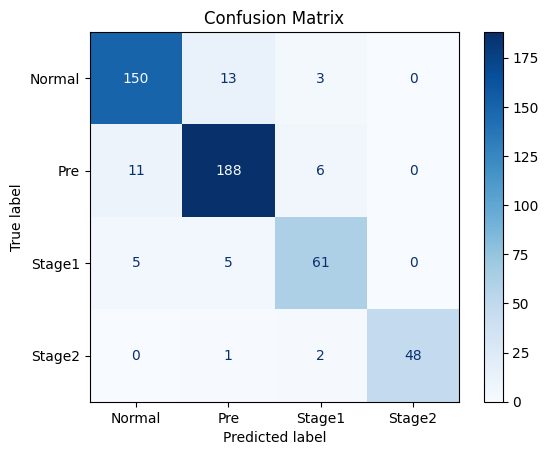

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)  #output layer which has probability of each digit
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Get the class with the highest probability

# Convert y_test to class labels if it is one-hot encoded
if y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test  

# Compute the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix (ensure that the labels match the number of classes)
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal','Pre','Stage1','Stage2'])  
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()


In [81]:
# Calculate TP, TN, FP, and FN for each class
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = conf_matrix.sum() - (FP + FN + TP)

print(f'TP: {TP}')
print(f'FP: {FP}')
print(f'FN: {FN}')
print(f'TN: {TN}')

TP: [150 188  61  48]
FP: [16 19 11  0]
FN: [16 17 10  3]
TN: [311 269 411 442]


In [82]:
# Accuracy
accuracy = np.sum(TP) / np.sum(conf_matrix)

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

Accuracy: 0.9067
Precision: [0.90361446 0.90821256 0.84722222 1.        ]
Recall: [0.90361446 0.91707317 0.85915493 0.94117647]
F1 Score: [0.90361446 0.91262136 0.85314685 0.96969697]
